<a href="https://colab.research.google.com/github/soobin2121/ML_EDU/blob/master/samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pandas.plotting import register_matplotlib_converters

In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (20,10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math
from datetime import date, timedelta
import warnings
warnings.filterwarnings("ignore")

In [52]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from IPython.core.display import display, HTML
from pandas_profiling import ProfileReport

In [ ]:
from google.colab import drive
ROOT = "/content/drive" 
print(ROOT) 
drive.mount(ROOT)  

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks'/'samsung'

/content/drive/My Drive/Colab Notebooks/samsung


In [ ]:
%ls

trend_w_demo.csv


In [90]:
data = pd.read_csv("trend_w_demo.csv", encoding='CP949')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low


In [91]:
data['YM'].unique()

array([202005, 202004, 201905, 201904])

In [92]:
data['Category'].unique()

array(['할인점', '취미', '오픈마켓/소셜', '뷰티', '디저트', '전문몰', '항공/여행사', '종합몰',
       '호텔/숙박', '면세점'], dtype=object)

In [93]:
data['기혼스코어'].unique()

array(['high', 'mid', 'low'], dtype=object)

In [ ]:
#data["기혼스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["유아자녀스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["초등학생자녀스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["중고생자녀스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["대학생자녀스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["전업주부스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)

In [ ]:
data.info()

In [96]:
data1 = data.groupby(['Category']).count()['연령대'].sort_values(ascending=False)
data1.head()

Category
전문몰        126062
디저트         89743
할인점         84636
오픈마켓/소셜     80742
뷰티          20453
Name: 연령대, dtype: int64

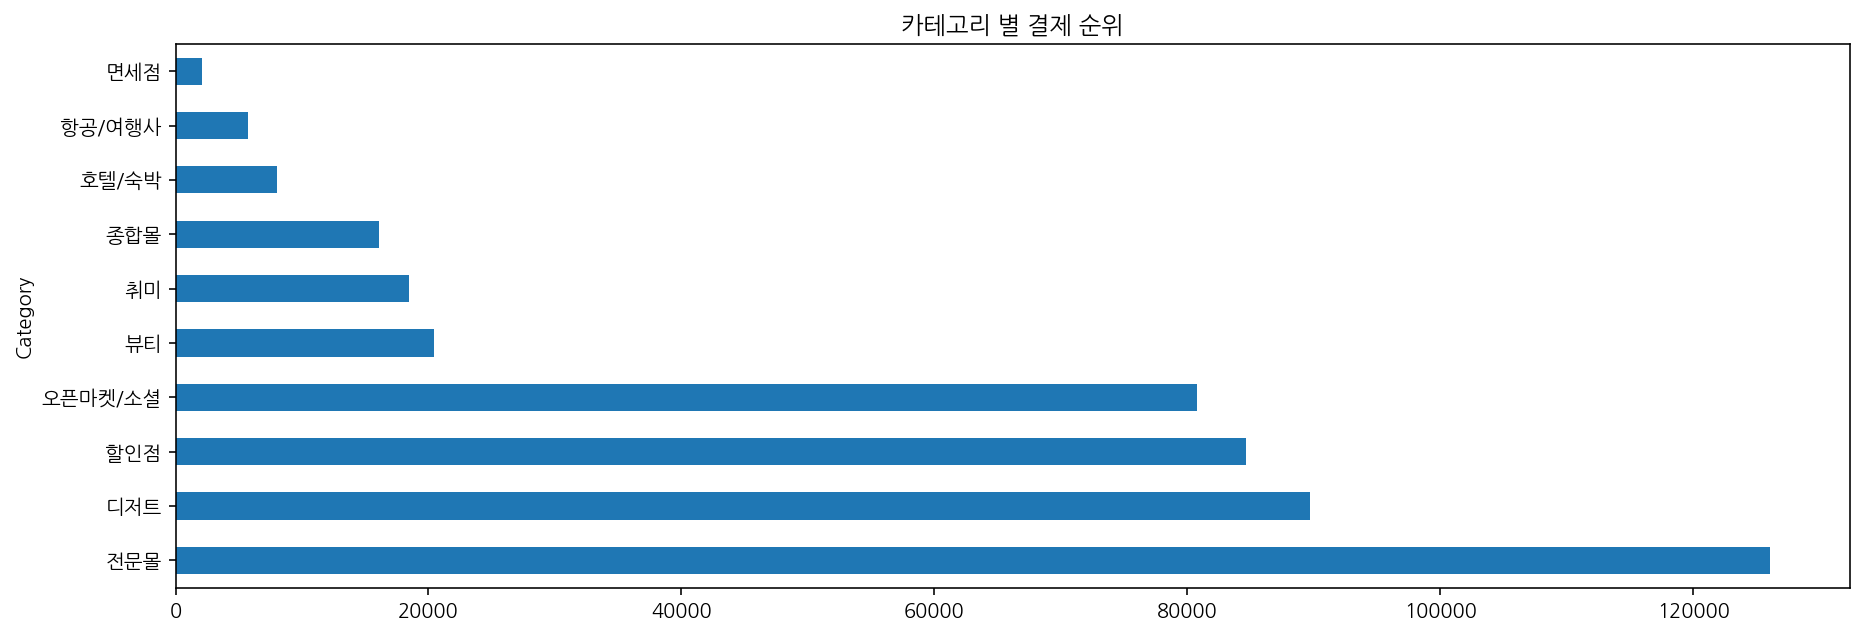

In [97]:
data1.plot(kind='barh', figsize=(15,5), title='카테고리 별 결제 순위')
plt.show()

In [284]:
data['성별구분']=data['성별구분'].replace([0],'여성')
data['성별구분']=data['성별구분'].replace([1],'남성')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,여성,F,high,low,high,mid,low,low
1,202005,취미,여성,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,남성,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,여성,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,여성,G,high,low,mid,mid,mid,low


In [285]:
data2= data[(data['YM']== 202004) | (data['YM']== 202005)]
data3= data[(data['YM']== 201904) | (data['YM']== 201905)]

In [286]:
housewife=data2['전업주부스코어'].value_counts()
housewife

low     107847
mid      93545
high      9076
Name: 전업주부스코어, dtype: int64

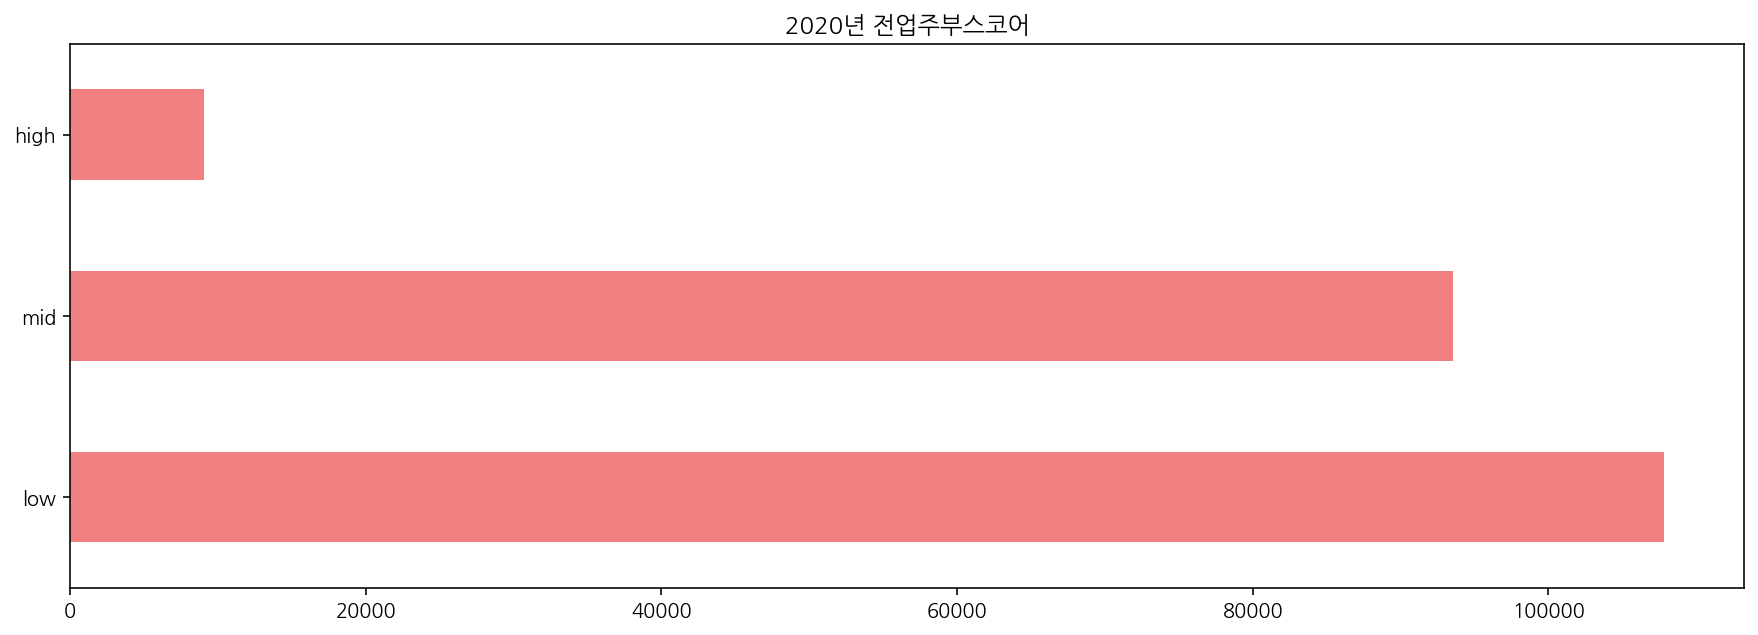

In [287]:
housewife=data2['전업주부스코어'].value_counts()
housewife= housewife.plot(kind='barh',figsize=(15,5),color='lightcoral',title='2020년 전업주부스코어')


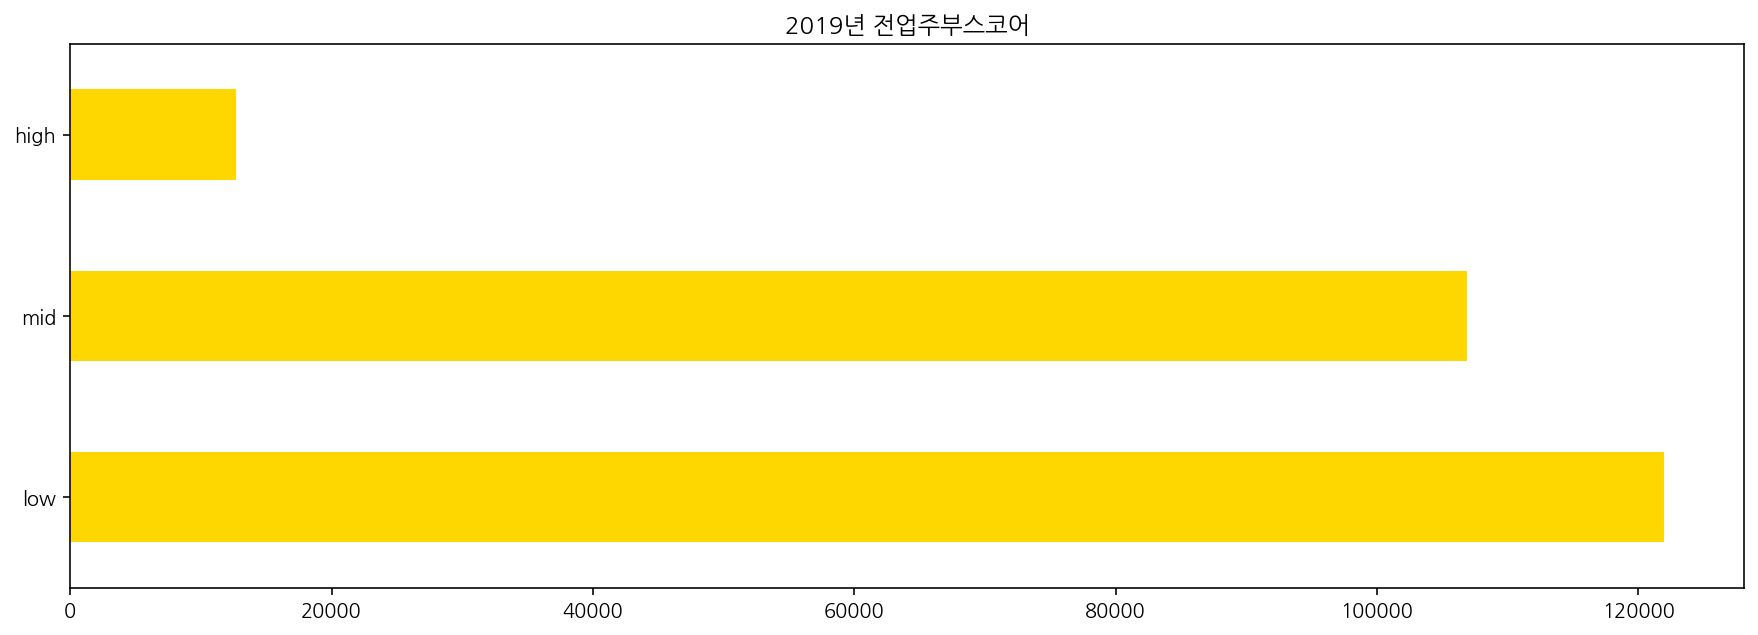

In [288]:
housewife=data3['전업주부스코어'].value_counts()
housewife= housewife.plot(kind='barh',figsize=(15,5), color='gold', title='2019년 전업주부스코어')

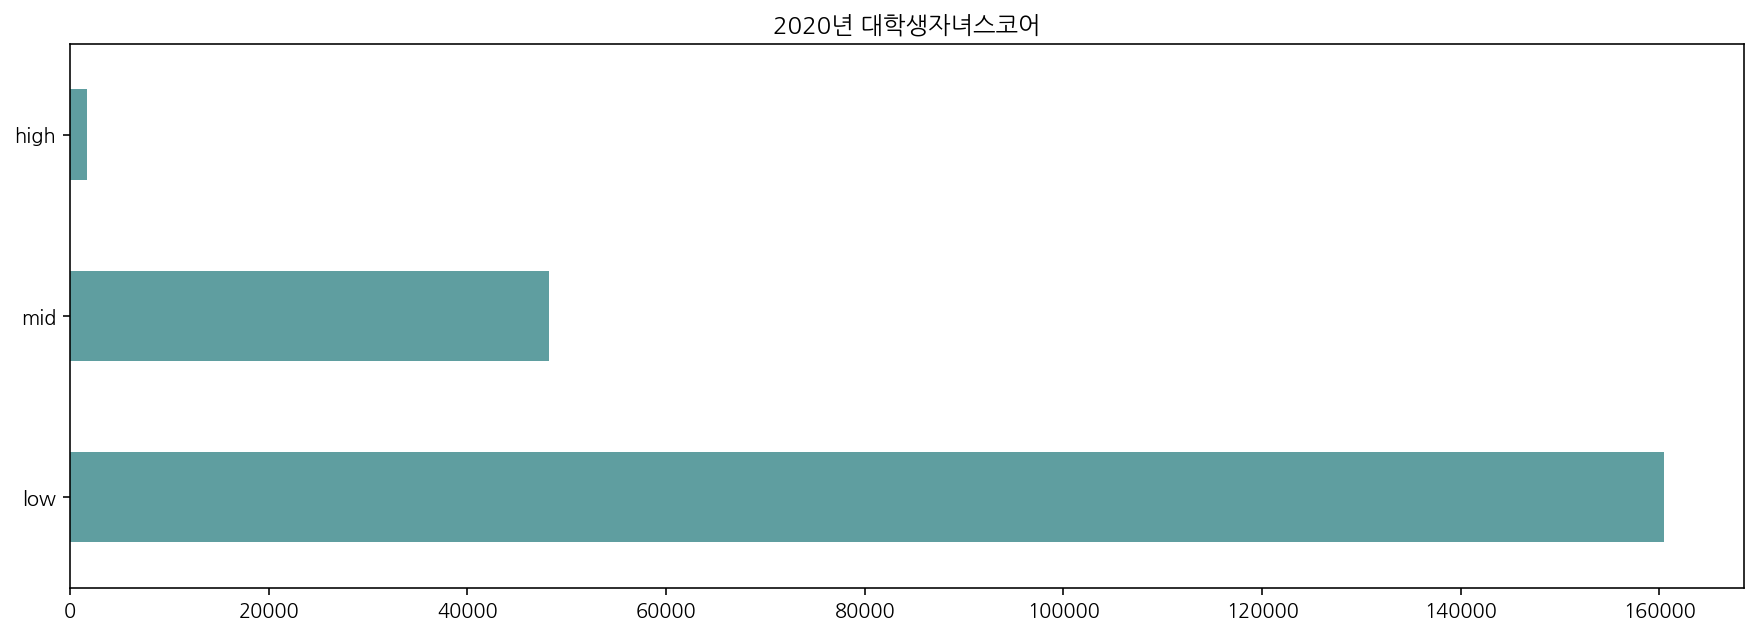

In [289]:
school=data2['대학생자녀스코어'].value_counts()
school= school.plot(kind='barh',figsize=(15,5), color='cadetblue',title='2020년 대학생자녀스코어')

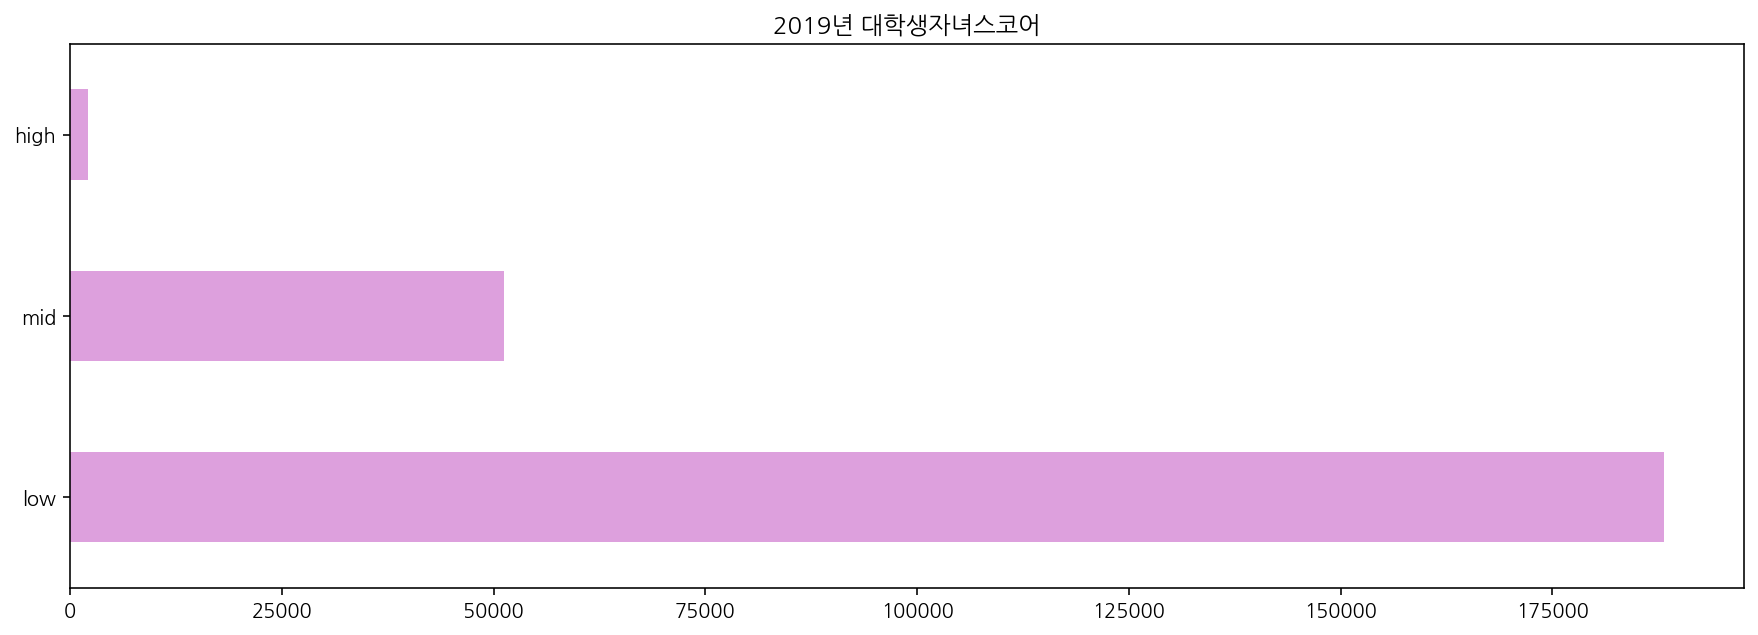

In [290]:
school=data3['대학생자녀스코어'].value_counts()
school= school.plot(kind='barh',figsize=(15,5), color='plum',title='2019년 대학생자녀스코어')


1. 2019년 카테고리 별 결제 순위(성별로)
2. 2020년 카테고리 별 결제 순위(성별로)
3. 2019년 연령별 건수( 성별로)
4. 2020년 연령별 건수(성별로)



In [291]:
data['성별구분']=data['성별구분'].replace([0],'여성')
data['성별구분']=data['성별구분'].replace([1],'남성')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,여성,F,high,low,high,mid,low,low
1,202005,취미,여성,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,남성,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,여성,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,여성,G,high,low,mid,mid,mid,low


In [292]:
data['성별구분'].value_counts()

남성    240336
여성    211702
Name: 성별구분, dtype: int64

In [293]:
data['Category'].value_counts()

전문몰        126062
디저트         89743
할인점         84636
오픈마켓/소셜     80742
뷰티          20453
취미          18449
종합몰         16119
호텔/숙박        8005
항공/여행사       5761
면세점          2068
Name: Category, dtype: int64

In [294]:
new_data= data.groupby(['Category','성별구분'])['연령대'].count().unstack('성별구분')
new_data

성별구분,남성,여성
Category,,
디저트,47427,42316
면세점,973,1095
뷰티,13495,6958
오픈마켓/소셜,45262,35480
전문몰,65731,60331
종합몰,11159,4960
취미,6843,11606
할인점,44286,40350
항공/여행사,2596,3165


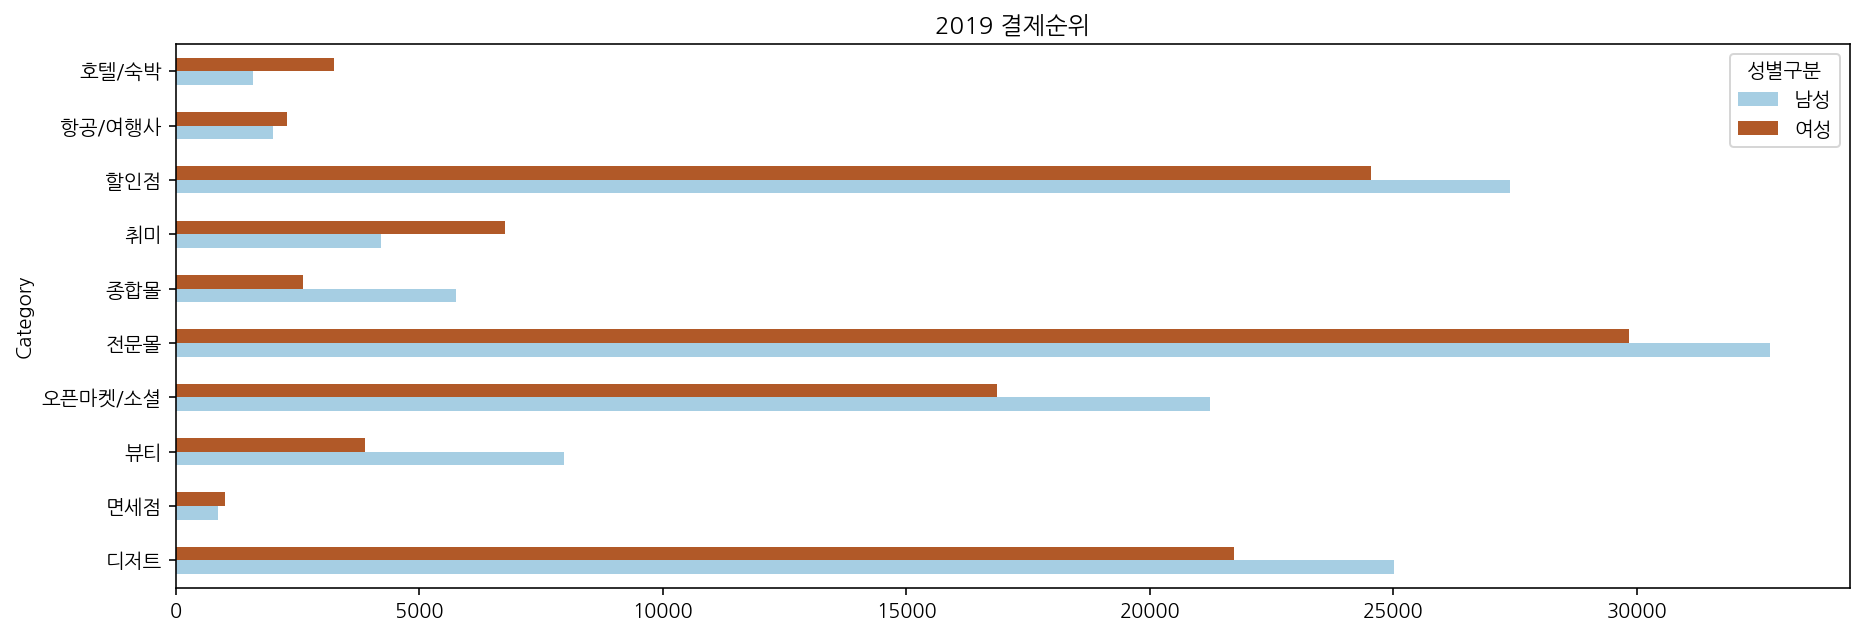

In [298]:
new_data= data3.groupby(['Category','성별구분'])['연령대'].count().unstack('성별구분')

new_data= new_data.plot(kind='barh',figsize=(15,5), colormap='Paired',title='2019 결제순위')

plt.show()

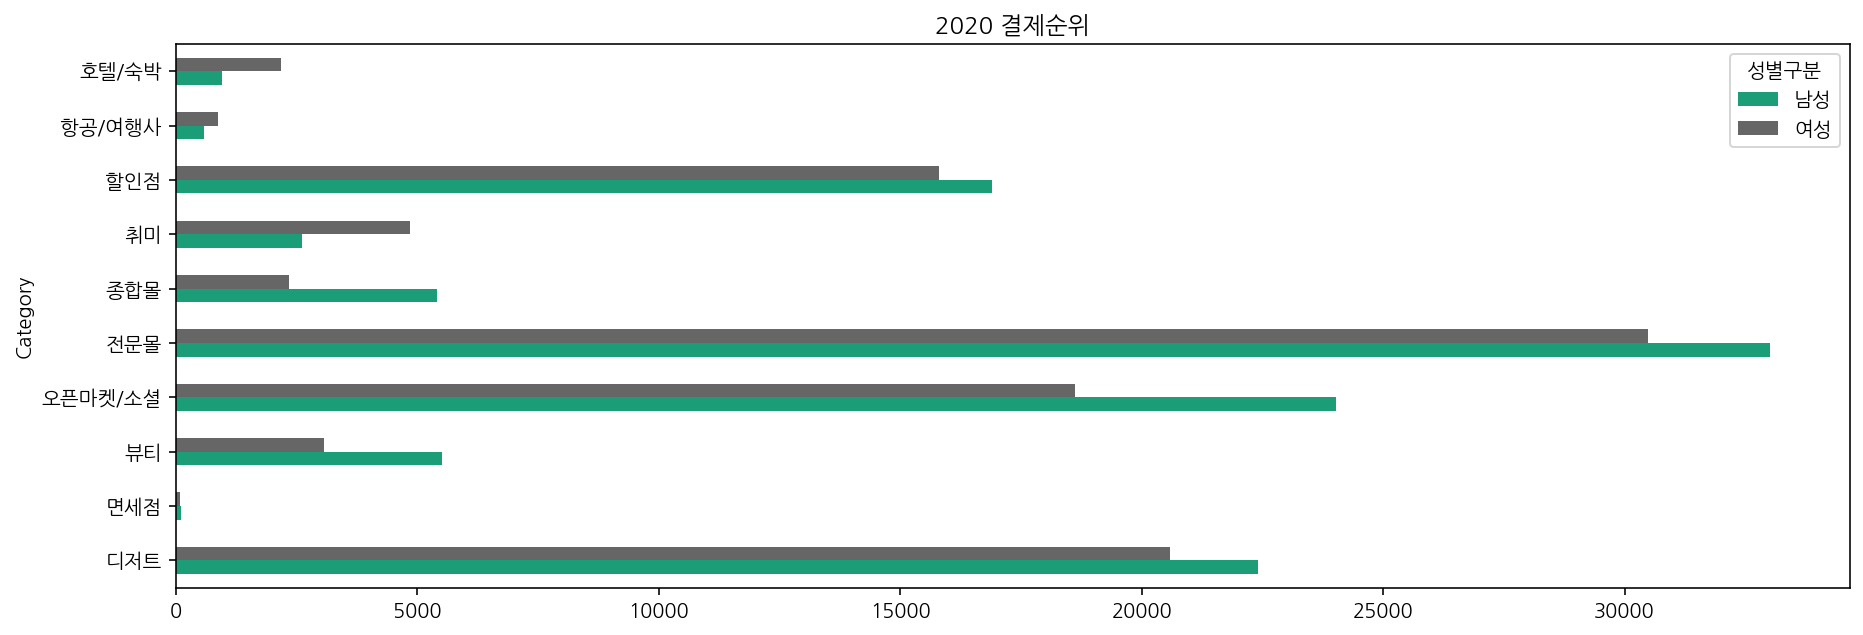

In [299]:
new_data2= data2.groupby(['Category','성별구분'])['연령대'].count().unstack('성별구분')

new_data= new_data2.plot(kind='barh',figsize=(15,5), colormap='Dark2',title='2020 결제순위')

plt.show()

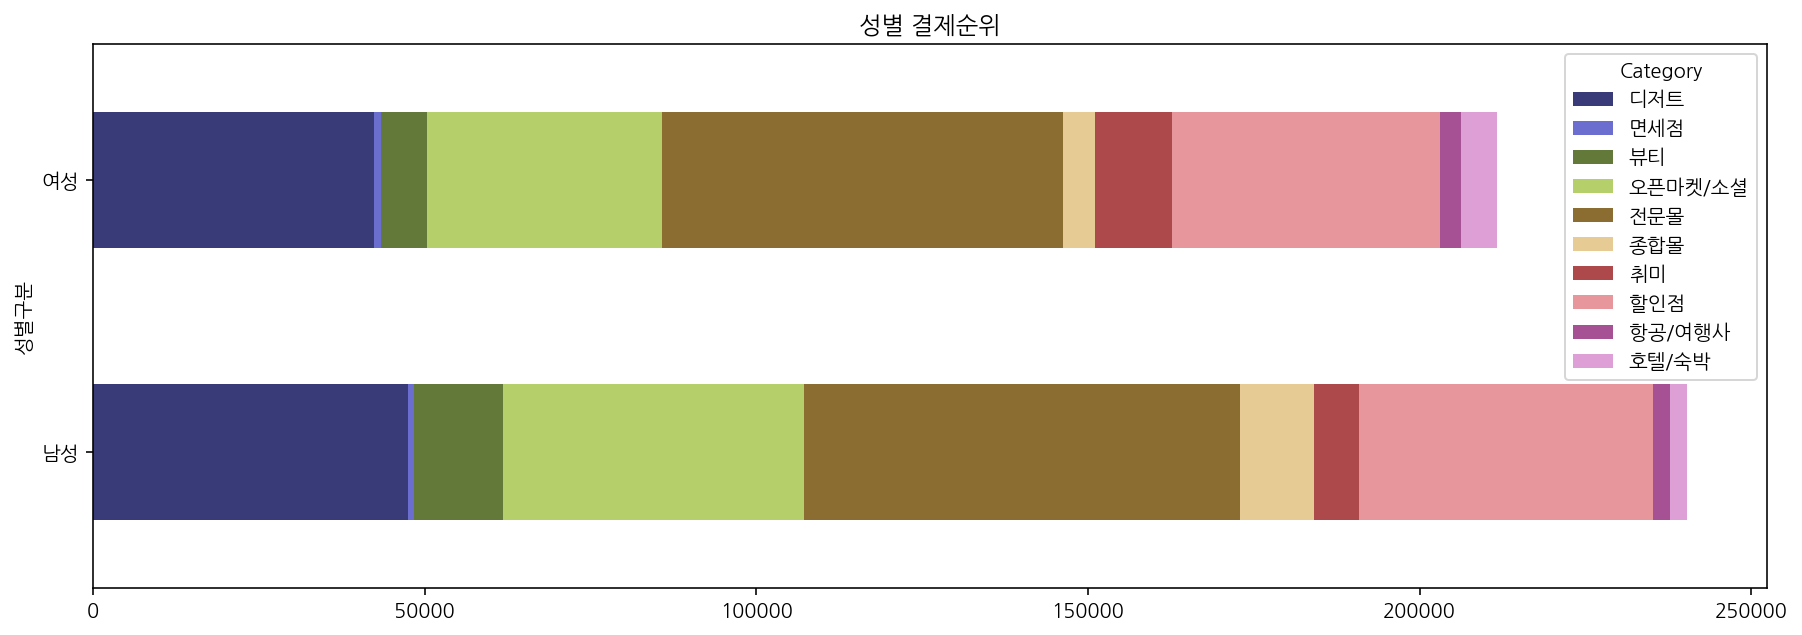

In [297]:
new_data3= data.groupby(['Category','성별구분'])['성별구분'].count().unstack('Category')

new_data= new_data3.plot(kind='barh',figsize=(15,5), colormap='tab20b',stacked=True, title='성별 결제순위')

In [256]:
plt.rcParams['figure.figsize'] = [20, 10]
from statsmodels.graphics.mosaicplot import mosaic

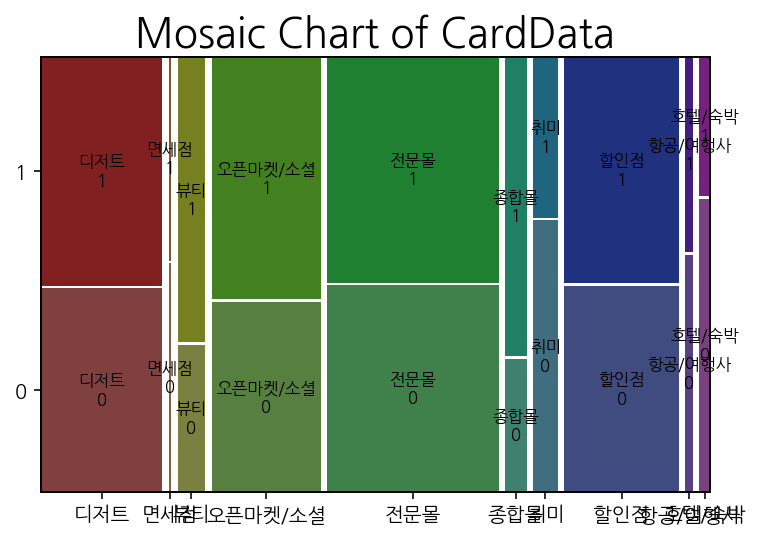

In [264]:
mosaic(data.sort_values('Category'), ['Category', '성별구분'], gap=0.01) 

plt.title('Mosaic Chart of CardData', fontsize=20)
    
plt.show()